# **Updating/Instaling Libraries**

In [ ]:
!pip install keras
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# **Importing Libraries**

In [ ]:
!pip install unidecode
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode # This line should now work as the module has been installed
import os
from time import time

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# **Loading Dataset**

In [ ]:
# Install imbalanced-learn if you don't have it
# !pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv("/content/drive/MyDrive/Bengali quotes database/all_quotes_cleaned.csv")  # Adjust the path

# Assuming you have 27 categories, but only a few samples for some categories
# For demonstration, we'll assume 'category_en' has only 'life' category so far
# You can adjust your actual categories in the 'category_en' column

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(df[['quotes']], df['category_en'])

# Convert the result back to a DataFrame
df = pd.DataFrame({'quotes': X_resampled['quotes'], 'category_en': y_resampled})

print(df['category_en'].value_counts())  # To check if the data is balanced now

# # Save the balanced dataset to a new CSV file
# df.to_csv('balanced_data.csv', index=False)


category_en
life             187
love             187
frinedship       187
success          187
nature           187
relation         187
rain             187
sky              187
moments          187
conjugal_life    187
law              187
illness          187
revenge          187
soul             187
decision         187
atheist          187
democracy        187
full_moon        187
change           187
dream            187
tension          187
examination      187
city             187
insul            187
depression       187
money            187
cloud            187
Name: count, dtype: int64


In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
print(df.value_counts())

quotes                                                                                                                           category_en
কষ্টের মেঘগুলো বৃষ্টি হয়ে ঝরে এই শহরে সবুজ পাতার হলুদবর্ণ দেয় যে নিমিষে সরিয়ে ।                                                  rain           17
গ্রামের বাদলা দিনের দিনগুলোয় চাল ভাজা আর নারকেল শহরের মানুষগুলো পায় না যে এর স্বাদ কেমন যেন সব বেআক্কেল….                        rain           15
তুমিহীন আজ আমি একা পথে হাটি পায়ের নিচে আজ খালি ভেজা মাটি ….                                                                      rain           15
রিমঝিম রিমঝিম এই বাদল দিনে তুমি ছাড়া কিছুতে কেন মন লাগে না ।। ঝিরঝির হাওয়া চঞ্চল মেঘে মন চায় মন চায় তোমাকে নিতে চিনে           rain           14
ঝুম বৃষ্টি যেন রিনিঝিনি নুপুরের ধ্বনি মন পাগল করা অপরূপ সৃষ্টি । উদাস হয়ে শুধুই তাকিয়ে থাকা ভেতরটা আজ কেন এত লাগে ফাঁকা?         rain           13
                                                                                                                            

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
# Define your feature (X) and target (y)
X = df['quotes']  # Replace 'text_column' with your actual text feature column
y = df['category_en']  # Replace 'label_column' with your actual target column

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train into a single DataFrame for the training set
df_train = pd.DataFrame({'quotes': X_train, 'category_en': y_train})

# Combine X_test and y_test into a single DataFrame for the test set
df_test = pd.DataFrame({'quotes': X_test, 'category_en': y_test})

# Check the shape of the split datasets
print(f"Train set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (4039, 2)
Test set shape: (1010, 2)


In [ ]:

df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
display(df_train)
df_train.head()
df_train.describe()
df_train.info()
print(df_train.category_en.unique())

,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",law,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",soul,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,life,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",frinedship,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,conjugal_life,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,sky,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",change,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",relation,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",frinedship,26


<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 3499 to 1180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       4039 non-null   object
 1   category_en  4039 non-null   object
 2   count        4039 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 126.2+ KB
['law' 'soul' 'life' 'frinedship' 'conjugal_life' 'revenge' 'relation'
 'examination' 'sky' 'love' 'depression' 'tension' 'atheist' 'decision'
 'moments' 'illness' 'insul' 'success' 'democracy' 'nature' 'dream' 'city'
 'full_moon' 'rain' 'change' 'cloud' 'money']


In [ ]:
display(df_test)
df_test.head()
df_test.describe()
df_test.info()

,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",sky,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,conjugal_life,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",full_moon,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,change,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,moments,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,soul,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,love,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,success,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",law,13


<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 618 to 3719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       1010 non-null   object
 1   category_en  1010 non-null   object
 2   count        1010 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 31.6+ KB


### **Preprocessing**


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# **Stopwords Removal**

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/Bengali quotes database/stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [ ]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))


In [ ]:
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [ ]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

# **Changing Labels to Numbers**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the combined target data
label_encoder.fit(pd.concat([y_train, y_test]))

# Encode the labels in the training and test sets
df_train['category_en'] = label_encoder.transform(df_train['category_en'])
df_test['category_en'] = label_encoder.transform(df_test['category_en'])

# Check the results
display(df_train)
display(df_test)

# Optional: If you want to see the mapping between categories and their encoded labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category to Label Mapping:", category_mapping)


,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",14,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",24,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,15,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",10,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,4,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,23,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",1,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",21,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",10,26


,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",23,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,4,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",11,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,1,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,17,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,24,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,16,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,25,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",14,13


Category to Label Mapping: {'atheist': np.int64(0), 'change': np.int64(1), 'city': np.int64(2), 'cloud': np.int64(3), 'conjugal_life': np.int64(4), 'decision': np.int64(5), 'democracy': np.int64(6), 'depression': np.int64(7), 'dream': np.int64(8), 'examination': np.int64(9), 'frinedship': np.int64(10), 'full_moon': np.int64(11), 'illness': np.int64(12), 'insul': np.int64(13), 'law': np.int64(14), 'life': np.int64(15), 'love': np.int64(16), 'moments': np.int64(17), 'money': np.int64(18), 'nature': np.int64(19), 'rain': np.int64(20), 'relation': np.int64(21), 'revenge': np.int64(22), 'sky': np.int64(23), 'soul': np.int64(24), 'success': np.int64(25), 'tension': np.int64(26)}


# **Removing Null values**

In [ ]:
#display non-null values
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [ ]:
#counting text length
df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>10]
df_test= df_test.loc[df_test['count']>10]

### **Feature Extraction with TFIDF**


In [ ]:
# import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# max features 5000,10000,50000,100000
text_transformer = TfidfVectorizer(ngram_range=(1, 3), lowercase=True, max_features=10000)

#%%time
# Convert the 'category_en' column to strings before applying fit_transform
X_train_text = text_transformer.fit_transform(df_train['category_en'].astype(str).values)
X_test_text = text_transformer.transform(df_test['category_en'].astype(str).values)

### **Model Creation of Logistic Regression**


In [ ]:
import psutil
import time

# Measure before training
print("Before training:")
print(f"CPU usage: {psutil.cpu_percent(interval=1)}%")

Before training:
CPU usage: 36.4%


In [ ]:
import time

start_time = time.time()

In [ ]:
# Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=.95,penalty='l2',solver='saga', multi_class='multinomial', random_state=15, n_jobs=4)

In [ ]:
model=logit.fit(X_train_text, df_train['category_en'].values)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## **Training time Logistic**

In [ ]:
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Total training time: 0.17 seconds


# **Memory usage Logistic**

In [ ]:
import psutil
import os

process = psutil.Process(os.getpid())
mem_info = process.memory_info()

# Show memory usage in megabytes
print(f"Current memory usage: {mem_info.rss / 1024 ** 2:.2f} MB")

Current memory usage: 948.64 MB


### **Model Creation of Multinomial Naive Bayes**


In [ ]:
#  Measure before training
print("Before training:")
print(f"CPU usage: {psutil.cpu_percent(interval=1)}%")

Before training:
CPU usage: 27.1%


In [ ]:
import time

start_time = time.time()

In [ ]:
# Import the MultinomialNB class from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB

#0.5, 1.5, 6
nb=MultinomialNB(alpha=1.5)
model=nb.fit(X_train_text, df_train['category_en'].values)

# ***Training time Naive***

In [ ]:
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Total training time: 0.03 seconds


# **Memory usage Naive**

In [ ]:
process = psutil.Process(os.getpid())
mem_info = process.memory_info()

# Show memory usage in megabytes
print(f"Current memory usage: {mem_info.rss / 1024 ** 2:.2f} MB")

Current memory usage: 948.64 MB


### **Logistic Regression Evaluation**


In [ ]:
test_preds = logit.predict(X_test_text)
test_labels=df_test['category_en'].values
#print(accuracy_score(test_labels,test_preds))
test_result=accuracy_score(test_labels,test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')


score = model.score(X_test_text,test_labels)
print(score)


print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

0.6264916467780429
Testing Accuracy: 0.6706443914081146
Precision :0.6317109808077959
Recall :0.6706443914081146
fscore :0.6358267984998296


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Misclassification Analysis with Confidence (Logistic Regression)**

In [ ]:
from collections import Counter
import numpy as np

# Get predicted probabilities (for confidence scores)
test_probs = logit.predict_proba(X_test_text)

# Find misclassified indices
misclassified_idx = np.where(test_preds != test_labels)[0]

# Count misclassifications per true class
misclass_counts = Counter(test_labels[misclassified_idx])

# Reverse label mapping
inv_category_map = {v: k for k, v in category_mapping.items()}

print("\n🔢 Misclassification counts per true class:\n")
for label, count in misclass_counts.items():
    label_name = inv_category_map[label]
    print(f"Class '{label_name}' (Label {label}): {count} misclassified samples")

# Show up to 5 misclassified examples with predicted confidence
print("\n📌 Examples of misclassified quotes (top 5):\n")
for idx in misclassified_idx[:5]:
    quote_text = df_test.iloc[idx]['quotes']
    true_label = test_labels[idx]
    pred_label = test_preds[idx]
    confidence = test_probs[idx][pred_label]

    print(f"Quote: {quote_text}")
    print(f"True Label: {inv_category_map[true_label]} ({true_label})")
    print(f"Predicted Label: {inv_category_map[pred_label]} ({pred_label})")
    print(f"Confidence (predicted class probability): {confidence:.3f}")
    print("-----")



🔢 Misclassification counts per true class:

Class 'conjugal_life' (Label 4): 35 misclassified samples
Class 'democracy' (Label 6): 18 misclassified samples
Class 'depression' (Label 7): 34 misclassified samples
Class 'city' (Label 2): 27 misclassified samples
Class 'cloud' (Label 3): 36 misclassified samples
Class 'atheist' (Label 0): 30 misclassified samples
Class 'dream' (Label 8): 27 misclassified samples
Class 'examination' (Label 9): 37 misclassified samples
Class 'change' (Label 1): 32 misclassified samples

📌 Examples of misclassified quotes (top 5):

Quote: বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত্বার আকর্ষণ মনের সংমিশ্রণহৃদয়ে স্পন্দন, দৃষ্টি নন্দন পবিত্র বন্ধন আবর্তন দাম্পত্য জীবন।সুখ দুঃখের সঙ্গি জীবন বন্দী,বন্ধু রূপে গ্রহণ মূল্য নিরুপণ,বিশ্বাস সমৰ্পণ নির্মল প্রেম।হৃদয় পরিপূর্ণ ভালোবাসায় উদ্বুদ্ধ সীমাহীন ভালোবাসাসমর্পিত বিসর্জিত প্রত্যাশার আবর্তননতুন জীবন উন্মোচন।
True Label: conjugal_life (4)
Predicted Label: decision (5)
Confidence (predicted class probability): 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.00,0.00,0.00,30.000000
1,0.00,0.00,0.00,32.000000
2,0.00,0.00,0.00,27.000000
3,0.00,0.00,0.00,36.000000
4,0.00,0.00,0.00,35.000000
5,11.82,100.00,21.14,37.000000
6,0.00,0.00,0.00,18.000000
7,0.00,0.00,0.00,34.000000
8,0.00,0.00,0.00,27.000000
9,0.00,0.00,0.00,37.000000


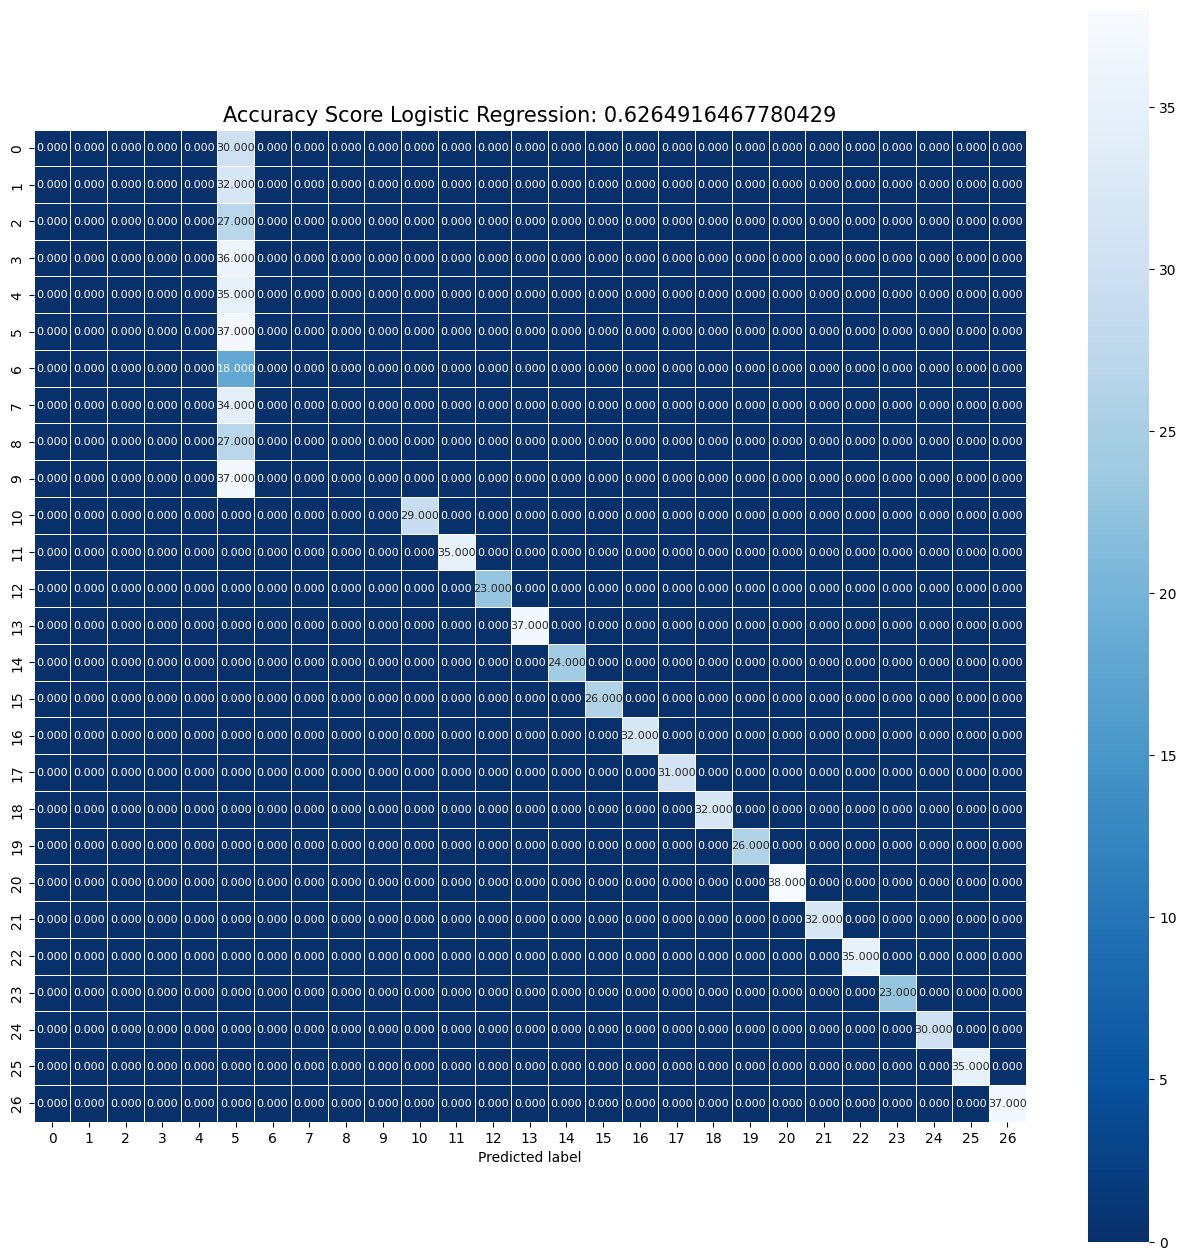

In [ ]:
cm = metrics.confusion_matrix(test_labels,test_preds)
plt.figure(figsize=(16,16))

# Create the heatmap with smaller annotation font size and clearer separation
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r',
            annot_kws={"size": 8})  # Adjust annotation font sizeplt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(score)
plt.title(all_sample_title, size = 15);

report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

### **Multinomial Naive Bayes Evaluation**

In [ ]:
test_preds = nb.predict(X_test_text)
test_labels=df_test['category_en'].values
#print(accuracy_score(test_labels,test_preds))
test_result=accuracy_score(test_labels,test_preds)

precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,test_preds, average='weighted')


score = model.score(X_test_text,test_labels)
print(score)


print("Testing Accuracy: "+str(test_result))

print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))


0.6264916467780429
Testing Accuracy: 0.6264916467780429
Precision :0.5860548450047257
Recall :0.6264916467780429
fscore :0.5900049695995484


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **MIsclassification of Naive Bayes**

In [ ]:
from collections import Counter
import numpy as np

# Get predicted probabilities (needed for confidence score)
test_probs = nb.predict_proba(X_test_text)

# Misclassified sample indices
misclassified_idx = np.where(test_preds != test_labels)[0]

# Count misclassifications per true class
misclass_counts = Counter(test_labels[misclassified_idx])

# Reverse label map (to show label names instead of numbers)
inv_category_map = {v: k for k, v in category_mapping.items()}

print("\n🔢 Misclassification counts per true class:\n")
for label, count in misclass_counts.items():
    label_name = inv_category_map[label]
    print(f"Class '{label_name}' (Label {label}): {count} misclassified samples")

# Show top 5 misclassified examples with prediction confidence
print("\n📌 Examples of misclassified quotes (top 5):\n")
for idx in misclassified_idx[:5]:
    quote_text = df_test.iloc[idx]['quotes']
    true_label = test_labels[idx]
    pred_label = test_preds[idx]
    confidence = test_probs[idx][pred_label]

    print(f"Quote: {quote_text}")
    print(f"True Label: {inv_category_map[true_label]} ({true_label})")
    print(f"Predicted Label: {inv_category_map[pred_label]} ({pred_label})")
    print(f"Confidence (predicted class probability): {confidence:.3f}")
    print("-----")



🔢 Misclassification counts per true class:

Class 'conjugal_life' (Label 4): 35 misclassified samples
Class 'democracy' (Label 6): 18 misclassified samples
Class 'decision' (Label 5): 37 misclassified samples
Class 'depression' (Label 7): 34 misclassified samples
Class 'city' (Label 2): 27 misclassified samples
Class 'cloud' (Label 3): 36 misclassified samples
Class 'atheist' (Label 0): 30 misclassified samples
Class 'dream' (Label 8): 27 misclassified samples
Class 'examination' (Label 9): 37 misclassified samples
Class 'change' (Label 1): 32 misclassified samples

📌 Examples of misclassified quotes (top 5):

Quote: বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত্বার আকর্ষণ মনের সংমিশ্রণহৃদয়ে স্পন্দন, দৃষ্টি নন্দন পবিত্র বন্ধন আবর্তন দাম্পত্য জীবন।সুখ দুঃখের সঙ্গি জীবন বন্দী,বন্ধু রূপে গ্রহণ মূল্য নিরুপণ,বিশ্বাস সমৰ্পণ নির্মল প্রেম।হৃদয় পরিপূর্ণ ভালোবাসায় উদ্বুদ্ধ সীমাহীন ভালোবাসাসমর্পিত বিসর্জিত প্রত্যাশার আবর্তননতুন জীবন উন্মোচন।
True Label: conjugal_life (4)
Predicted Label: rai

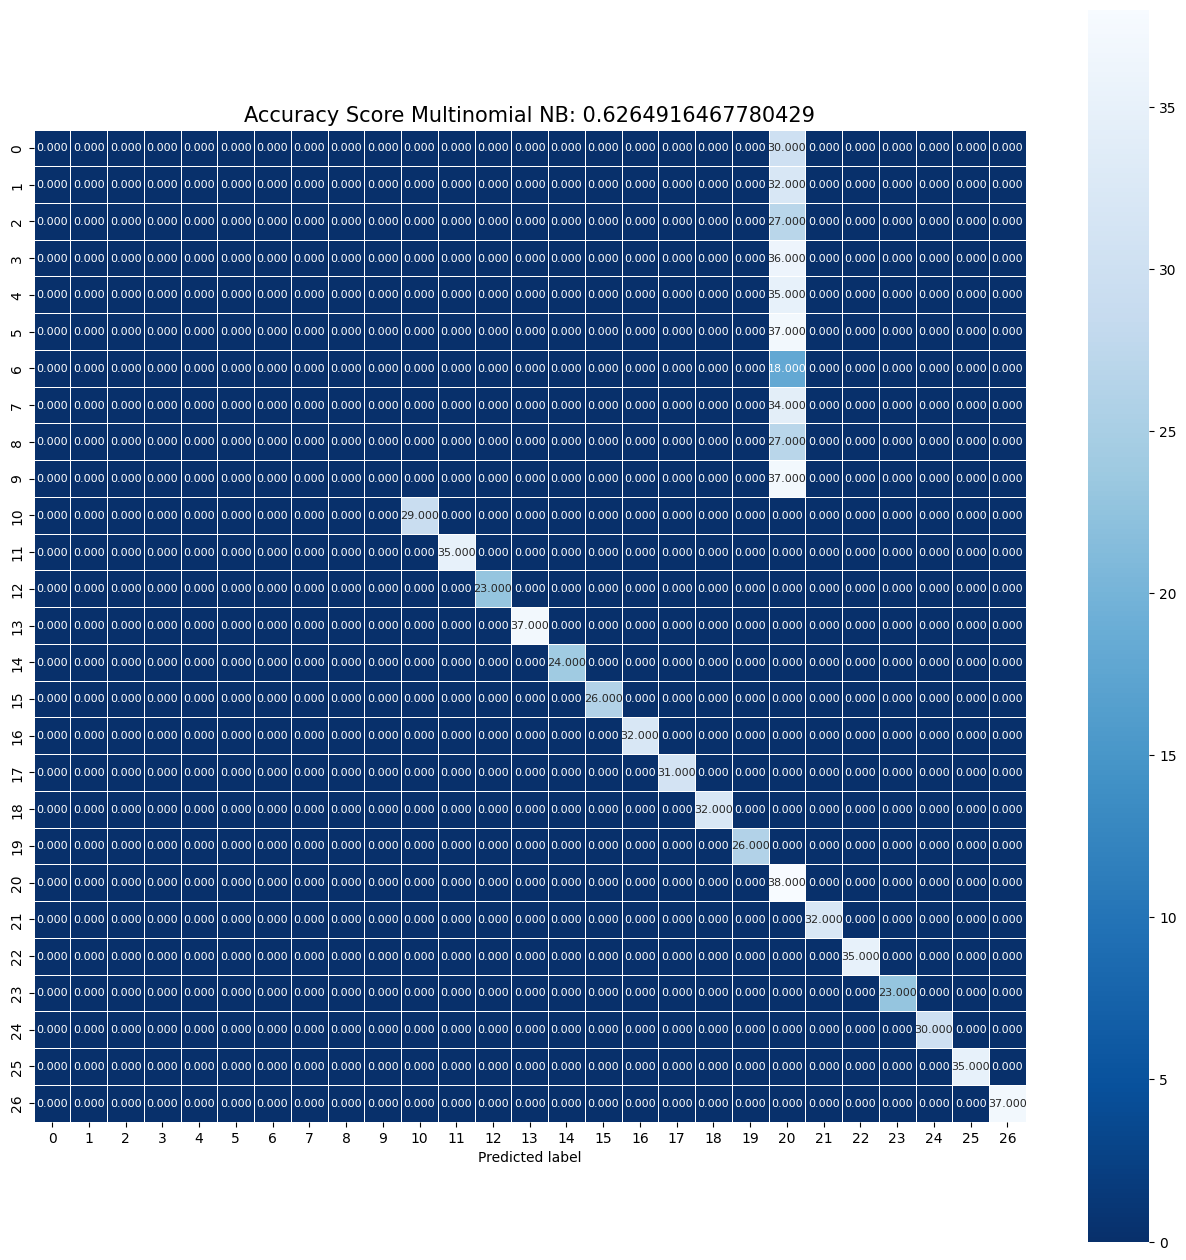

In [ ]:

cm = metrics.confusion_matrix(test_labels,test_preds)

plt.figure(figsize=(16,16))

# Create the heatmap with smaller annotation font size and clearer separation
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r',
            annot_kws={"size": 8})  # Adjust annotation font sizeplt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Multinomial NB: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = test_preds, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.00,0.00,0.00,30.000000
1,0.00,0.00,0.00,32.000000
2,0.00,0.00,0.00,27.000000
3,0.00,0.00,0.00,36.000000
4,0.00,0.00,0.00,35.000000
5,0.00,0.00,0.00,37.000000
6,0.00,0.00,0.00,18.000000
7,0.00,0.00,0.00,34.000000
8,0.00,0.00,0.00,27.000000
9,0.00,0.00,0.00,37.000000
